## Probem 1.

Problem Statement:
A research laboratory was developing a new compound for the relief of severe cases of hay fever. In an experiment with 36 volunteers, the amounts of the two active ingredients (A & B) in the compound were varied at three levels each. Randomization was used in assigning four volunteers to each of the nine treatments.

In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols      
from statsmodels.stats.anova import _get_covariance,anova_lm 
from statsmodels.stats.multicomp import pairwise_tukeyhsd  
from statsmodels.stats.multicomp import MultiComparison 
sns.set(color_codes=True)
%matplotlib inline 
sns.set_palette("deep")


In [2]:
pwd

'C:\\Users\\niranja.dhavan\\Desktop\\Advanced Statistics\\Assignment'

In [3]:
fever = pd.read_csv('C:\\Users\\niranja.dhavan\\Desktop\\Advanced Statistics\\Assignment\\Fever.csv')

In [4]:
fever.head()

,A,B,Volunteer,Relief,A&B
0,1,1,1,2.4,A1--B1
1,1,1,2,2.7,A1--B1
2,1,1,3,2.3,A1--B1
3,1,1,4,2.5,A1--B1
4,1,2,1,4.6,A1--B2


In [5]:
fever.tail()

,A,B,Volunteer,Relief,A&B
31,3,2,4,10.1,A3--B2
32,3,3,1,13.5,A3--B3
33,3,3,2,13.0,A3--B3
34,3,3,3,13.3,A3--B3
35,3,3,4,13.2,A3--B3


In [6]:
fever.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   A          36 non-null     int64  
 1   B          36 non-null     int64  
 2   Volunteer  36 non-null     int64  
 3   Relief     36 non-null     float64
 4   A&B        36 non-null     object 
dtypes: float64(1), int64(3), object(1)
memory usage: 1.5+ KB


In [7]:
fever['A']= pd.Categorical(fever['A'])

In [8]:
fever['B']= pd.Categorical(fever['B'])

In [9]:
fever['A&B']= pd.Categorical(fever['A&B'])

In [10]:
fever.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   A          36 non-null     category
 1   B          36 non-null     category
 2   Volunteer  36 non-null     int64   
 3   Relief     36 non-null     float64 
 4   A&B        36 non-null     category
dtypes: category(3), float64(1), int64(1)
memory usage: 1.4 KB


In [11]:
fever['A'].value_counts()

3    12
2    12
1    12
Name: A, dtype: int64

In [12]:
fever['B'].value_counts()

3    12
2    12
1    12
Name: B, dtype: int64

In [13]:
pivot1 = fever.pivot_table(index=['A'], values=['Relief'], aggfunc='mean')
pivot1

,Relief
A,
1,3.883333
2,7.833333
3,9.833333


In [14]:
pivot2 = fever.pivot_table(index=['B'], values=['Relief'], aggfunc='mean')
pivot2

,Relief
B,
1,4.633333
2,7.933333
3,8.983333


In [15]:
pivot3 = fever.pivot_table(index=['A','B'], values=['Relief'], aggfunc='mean')
pivot3

Relief
A B        
1 1   2.475
  2   4.600
  3   4.575
2 1   5.450
  2   8.925
  3   9.125
3 1   5.975
  2  10.275
  3  13.250

## The Hypothesis for the One Way ANOVA are:
    
## $H_0$: $All\,the\, ingredient A\, means\,of\,all\,the\,3\,levels\,under\,consideration\, are\, equal.$
## $H_a$: $At \,least\,one\,of\,the\,ingredient\,A\,means\,of \,all\,the\,3\,levels\,consideration\, are\, unequal.$

## 1.2) Perform one-way ANOVA for variable ‘A’ with respect to the variable ‘Relief’. State whether the Null Hypothesis is accepted or rejected based on the ANOVA results.

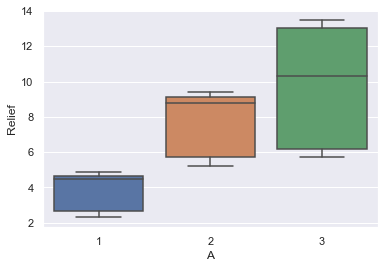

In [16]:
sns.boxplot(x='A',y='Relief',data=fever)

In [17]:
formula = 'Relief ~ C(A)'
model = ols(formula, fever).fit()
aov_table = anova_lm(model)
print(aov_table)

            df  sum_sq     mean_sq          F        PR(>F)
C(A)       2.0  220.02  110.010000  23.465387  4.578242e-07
Residual  33.0  154.71    4.688182        NaN           NaN


Now, we see that the corresponding p-value is less than alpha (0.05). Thus, we $\textbf{fail to Accept}$ the $\textbf{Null Hypothesis}$ ($H_0$).
This means at least one partiAs we rejected the Null Hypothesis in the F stat,We need to check which of particular A type has a different mean.cular A type has different mean of 'Relief' as compared to the other A Type.

As we rejected the Null Hypothesis in the F stat,We need to check which of particular A type has a different mean.

In [18]:
mc = MultiComparison(fever['Relief'],fever['A'] )
result = mc.tukeyhsd()
 
print(result)


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2     3.95  0.001  1.7814 6.1186   True
     1      3     5.95  0.001  3.7814 8.1186   True
     2      3      2.0 0.0755 -0.1686 4.1686  False
---------------------------------------------------


## Basis the Tukey HSD it was identified that level 2 & level 3 have same mean relief time for ingredient 'A' with respect to the Relief. Whereas Level 1 & 2, level 1 & 3 have different means relief time for ingredient 'A ‘with respect to the Relief. Thus, we reject the null hypothesis for 1 & 2 and 1 & 3 pairs but fail to reject for the 2 & 3 pair. This means at Level 2 and Level 3 for ingredient A the relief would be higher as compared with level 1.

## 1.3) Perform one-way ANOVA for variable ‘B’ with respect to the variable ‘Relief’. State whether the Null Hypothesis is accepted or rejected based on the ANOVA results.

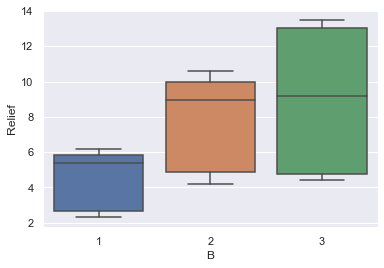

In [19]:
sns.boxplot(x='B',y='Relief',data=fever)

In [20]:
formula = 'Relief ~ C(B)'
model = ols(formula, fever).fit()
aov_table = anova_lm(model)
print(aov_table)

            df  sum_sq    mean_sq         F   PR(>F)
C(B)       2.0  123.66  61.830000  8.126777  0.00135
Residual  33.0  251.07   7.608182       NaN      NaN


Now, we see that the corresponding p-value is less than alpha (0.05). Thus, we $\textbf{fail to Accept}$ the $\textbf{Null Hypothesis}$ ($H_0$).
This means at least one particular B type has a different average Relief value as compared to the other B Type.

As we rejected the Null Hypothesis in the F stat,We need to check which particular B type has a diffent mean.

In [21]:
mc = MultiComparison(fever['Relief'],fever['B'] )
result = mc.tukeyhsd()
 
print(result)


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2      3.3 0.0164  0.5374 6.0626   True
     1      3     4.35 0.0014  1.5874 7.1126   True
     2      3     1.05 0.6164 -1.7126 3.8126  False
---------------------------------------------------


## Basis the Tukey HSD it was identified that level 2 & level 3 have same mean relief time for ingredient 'B' with respect to the Relief. Whereas Level 1 & 2, level 1 & 3 have different means relief time for ingredient 'B' with respect to the Relief. Thus, we reject the null hypothesis for the 1 & 2 and 1 & 3 pairs but fail to reject for the 2 & 3 pair. This means at Level 2 and Level 3 for ingredient B the relief would be higher as compared with level 1.

## 1.4) Analyse the effects of one variable on another with the help of an interaction plot. 
What is the interaction between the two treatments?

Visual interpretation of Interaction of ingredient 'A' with Y variable ‘Relief’ Considering Hue as Variable ‘B’ with confidence intervals ci=99 & ci=None.

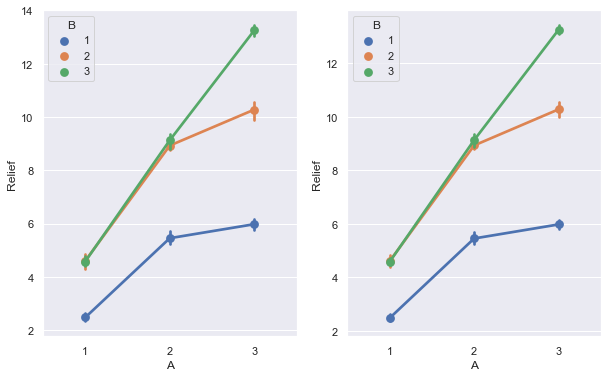

In [22]:
#sns.pointplot(data=fever)
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(10,6))
sns.pointplot(x='A', y='Relief', data=fever, hue='B',ci=99,ax=axes[0])
sns.pointplot(x='A', y='Relief', data=fever, hue='B',ax=axes[1])
plt.show()

Visual interpretation of Interaction of ingredient 'A' with Y variable ‘Relief’ Considering Hue as Variable 'B' with confidence intervals ci=99 & ci=None.

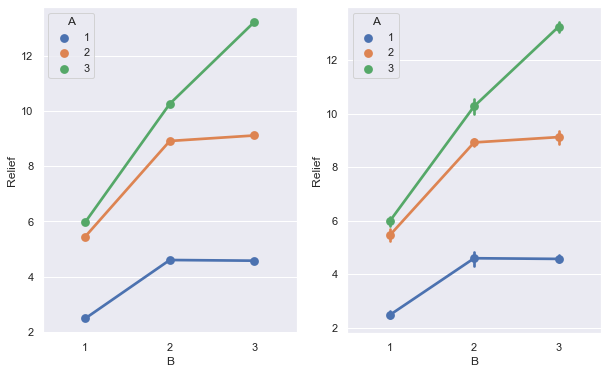

In [23]:
#sns.pointplot(data=fever)
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(10,6))
sns.pointplot(x='B', y='Relief', data=fever, hue='A',ci=None,ax=axes[0])
sns.pointplot(x='B', y='Relief', data=fever, hue='A',ax=axes[1])
plt.show()

Visual interpretation of Interaction of ingredient 'B' with Y variable ‘Relief’ Considering Hue as Variable 'A' with confidence intervals ci=99 & ci=None.

Basis the point plot we indentify that there is slight interaction between variables. 

## 1.5) Perform a two-way ANOVA based on the different ingredients (variable ‘A’ & ‘B’) with the variable 'Relief' and state your results.

In [24]:
formula = 'Relief ~ C(A) + C(B)'
model = ols(formula, fever).fit()
aov_table = anova_lm(model)
print(aov_table)

            df  sum_sq     mean_sq           F        PR(>F)
C(A)       2.0  220.02  110.010000  109.832850  8.514029e-15
C(B)       2.0  123.66   61.830000   61.730435  1.546749e-11
Residual  31.0   31.05    1.001613         NaN           NaN


The p-value in the both the treatments is less than $\alpha$(0.05) and thus we will reject the Null Hypothesis.

Let us check whether there is any interaction effect between the ingredient A & ingredient B.

As we can see that there is some sort of interaction between the two variables from above Point plot (Question 1.4), we shall introduce a new term while performing the Two-Way ANOVA.

formula = 'Relief ~ C(A) + C(B) + C(A):C(B)'
model = ols(formula, fever).fit()
aov_table = anova_lm(model)
print(aov_table)

Due to the inclusion of the interaction effect term, we can see a change in the p-value of the first two treatments as compared to the Two-Way ANOVA without the interaction effect terms. As we see p-value of the interaction effect term of 'ingredient A' and 'ingredient B' is smaller than Alpha - suggesting that the fail to accept Null Hypothesis. Hence there is interaction between the ingredient A & ingredient B.

## Check for Assumptions

Checking tests for normaility by creating Box plots & running a Shapiro test

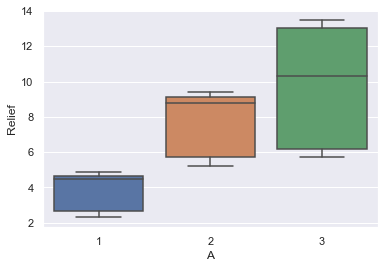

In [25]:
sns.boxplot(x="A", y="Relief", data=fever);
#Box plot for ingredient A

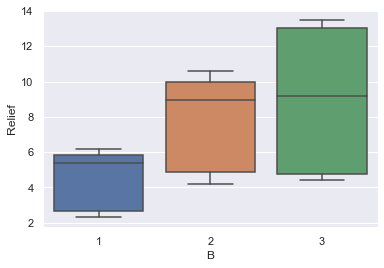

In [26]:
sns.boxplot(x="B", y="Relief", data=fever);
#Box plot for ingredient B

## The Hypothesis for Shapiro Tests:
    
## $H_0$: $The\, population\, is\,normally\,distributed.$
## $H_a$: $There \,is\,evidence\,that\,the\, population\, is\,not \,normally\, Distributed.$


In [27]:
from scipy.stats import shapiro

In [28]:
name = fever.get('A') 

In [29]:
for name in fever['A'].unique(): # This code snippet loops through the entries of the variable 'Weight_Gain'
    print ("{}: {}".format(name,shapiro(fever['Relief'][fever['A'] == name])))
    #The Result displays(W Statistic,P Value for Shapiro Test)

1: (0.7686296701431274, 0.004211828112602234)
2: (0.728706955909729, 0.001616060733795166)
3: (0.847996175289154, 0.03468279168009758)


In [30]:
name = fever.get('B') 

In [31]:
for name in fever['B'].unique(): # This code snippet loops through the entries of the variable 'Duration'
    print ("{}: {}".format(name,shapiro(fever['Relief'][fever['B'] == name])))
     #The Result displays(W Statistic,P Value for Shapiro Test)

1: (0.7656338810920715, 0.003910908009856939)
2: (0.8065383434295654, 0.01112875435501337)
3: (0.8446834087371826, 0.031581711024045944)


Basis shapiro test we tend to reject null hypothesis. That means the data in not normally distributed. But basis the boxplots we see that the data is fairly normal and go ahead with Levene's test.

Now we will perform the Levene's test.

## The Hypothesis for Lavene's Tests:
    
## $H_0$: $The\, population\, variances\,are\,equal.$
## $H_a$: $There \,is\,a\, difference\,between\, population\, Variances.$


In [32]:
names = fever.get('A') 

In [33]:
unique = names.unique()
unique

[1, 2, 3]
Categories (3, int64): [1, 2, 3]

In [34]:
from scipy.stats import levene

In [35]:
levene(fever['Relief'][fever['A'] == unique[0]], 
               fever['Relief'][fever['A'] == unique[1]], 
               fever['Relief'][fever['A'] == unique[2]])

LeveneResult(statistic=4.511350350740447, pvalue=0.018535088623493387)

Basis Levene's Test proves that there is homogenity of variances between all the Types of Level A. Hence Accept Null Hypothesis

In [36]:
names = fever.get('B') 

In [37]:
unique = names.unique()
unique

[1, 2, 3]
Categories (3, int64): [1, 2, 3]

In [38]:
levene(fever['Relief'][fever['B'] == unique[0]], 
               fever['Relief'][fever['B'] == unique[1]],
               fever['Relief'][fever['B'] == unique[2]])

LeveneResult(statistic=2.941356517208818, pvalue=0.06675699295483081)

Basis Levene's Test proves that there is homogenity of variances between all the Types of Level B. Hence Accept Null Hypothesis.

In [39]:
fever

,A,B,Volunteer,Relief,A&B
0,1,1,1,2.4,A1--B1
1,1,1,2,2.7,A1--B1
2,1,1,3,2.3,A1--B1
3,1,1,4,2.5,A1--B1
4,1,2,1,4.6,A1--B2
5,1,2,2,4.2,A1--B2
6,1,2,3,4.9,A1--B2
7,1,2,4,4.7,A1--B2
8,1,3,1,4.8,A1--B3
9,1,3,2,4.5,A1--B3


In [40]:
mc = MultiComparison(fever['Relief'],fever['A&B'] )
result = mc.tukeyhsd()
 
print(result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
A1--B1 A1--B2    2.125  0.001  1.5413  2.7087   True
A1--B1 A1--B3      2.1  0.001  1.5163  2.6837   True
A1--B1 A2--B1    2.975  0.001  2.3913  3.5587   True
A1--B1 A2--B2     6.45  0.001  5.8663  7.0337   True
A1--B1 A2--B3     6.65  0.001  6.0663  7.2337   True
A1--B1 A3--B1      3.5  0.001  2.9163  4.0837   True
A1--B1 A3--B2      7.8  0.001  7.2163  8.3837   True
A1--B1 A3--B3   10.775  0.001 10.1913 11.3587   True
A1--B2 A1--B3   -0.025    0.9 -0.6087  0.5587  False
A1--B2 A2--B1     0.85 0.0011  0.2663  1.4337   True
A1--B2 A2--B2    4.325  0.001  3.7413  4.9087   True
A1--B2 A2--B3    4.525  0.001  3.9413  5.1087   True
A1--B2 A3--B1    1.375  0.001  0.7913  1.9587   True
A1--B2 A3--B2    5.675  0.001  5.0913  6.2587   True
A1--B2 A3--B3     8.65  0.001  8.0663  9.2337   True
A1--B3 A2--B1    0.875  0.001  0.2913  1.4587 

## Basis this model we can say that Relief time can be increased based on combination of both the ingredient “A” & ingredient “B”. Except the combination of A1--B2 A1--B3, A2--B1 A3--B1, A2--B2 A2--B3. Rest all of the combination has the interaction amongst both the ingredient A & ingredient B. So therefore, we can conclude that on combination of all ingredient A & ingredient B except combination of A1--B2 A1--B3, A2--B1 A3--B1, A2--B2 A2--B3. we can increase the relief time of  severe cases of hay fever.

## The END

# Problem 2:

A company performed a survey to understand the income of households in various neighbourhoods of a country. The data dictionary is also present. You can access the data dictionary from the following file Income_Data Dictionary. Please refer to the following data set to solve the problem Income.csv. ['FamilyIncome' is the target variable]

# Income Data

Description

Number of observations : 753
observation : individuals
continent : Europe

A data frame containing :

1.WorkingHoursWife-Hours that a wife is working

2.WifeAge-Age of the wife

3.EducationWife-Educational attained by wife in years

4.WifeHourEarnings-The average hourly earnings of the wife in euros

5.WifeWage-The wage of the wife reported at the time

6.WorkingHoursHusband-Hours that the husband is working

7.HusbandAge-Age of the husband

8.EducationHusband-Education attained by husband in years

9.HusbandWage-The wage of the husband reported at the time

10.EducationWifeMother-Education attained by the wife’s mother in years

11.EducationWifeFather-Education attained by the wife’s father in years

12.UnemploymentRate-unemployment rate in county of residence, in percentage points

13.WifeExperience-Actual years of wife's previous labor market experience

14.FamilyIncome-Income of the family in euros



In [41]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as sc # scientific python
import statsmodels.api as sm
from scipy.stats import pearsonr
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

%matplotlib inline

# 2.1) Perform exploratory data analysis on the dataset. Showcase some charts, graphs.

In [42]:
# Load the data and check first 10 rows
#Aim is to perform Linear Regression for the "FamilyIncome" column using all other Independent variables

df = pd.read_csv("Income.csv")
df.head(10)

,WorkingHoursWife,WifeAge,EducationWife,WifeHourEarnings,WifeWage,WorkingHoursHusband,HusbandAge,EducationHusband,HusbandWage,EducationWifeMother,EducationWifeFather,UnemploymentRate,WifeExperience,FamilyIncome
0,1610,32,12,3.3540,2.65,2708,34,12,4.0288,12,7,5.0,14,16310
1,1656,30,12,1.3889,2.65,2310,30,9,8.4416,7,7,11.0,5,21800
2,1980,35,12,4.5455,4.04,3072,40,12,3.5807,12,7,5.0,15,21040
3,456,34,12,1.0965,3.25,1920,53,10,3.5417,7,7,5.0,6,7300
4,1568,31,14,4.5918,3.60,2000,32,12,10.0000,12,14,9.5,7,27300
5,2032,54,12,4.7421,4.70,1040,57,11,6.7106,14,7,7.5,33,19495
6,1440,37,16,8.3333,5.95,2670,37,12,3.4277,14,7,5.0,11,21152
7,1020,54,12,7.8431,9.98,4120,53,8,2.5485,3,3,5.0,35,18900
8,1458,48,12,2.1262,0.00,1995,52,4,4.2206,7,7,3.0,24,20405
9,1600,39,12,4.6875,4.15,2100,43,12,5.7143,7,7,5.0,21,20425


In [43]:
# Check the tail for grand total if any

df.tail(10)

,WorkingHoursWife,WifeAge,EducationWife,WifeHourEarnings,WifeWage,WorkingHoursHusband,HusbandAge,EducationHusband,HusbandWage,EducationWifeMother,EducationWifeFather,UnemploymentRate,WifeExperience,FamilyIncome
743,0,53,12,0.0,0.00,2677,53,12,5.6033,0,0,7.5,11,23426
744,0,42,10,0.0,2.75,3150,44,12,7.9365,3,3,11.0,14,26000
745,0,39,12,0.0,0.00,1430,34,12,2.9476,7,0,9.5,5,7840
746,0,32,10,0.0,0.00,3307,36,4,2.0562,7,3,7.5,2,6800
747,0,36,12,0.0,0.00,3120,39,12,1.3013,7,12,14.0,4,5330
748,0,40,13,0.0,0.00,3020,43,16,9.2715,10,10,9.5,5,28200
749,0,31,12,0.0,0.00,2056,33,12,4.8638,12,12,7.5,14,10000
750,0,43,12,0.0,0.00,2383,43,12,1.0898,10,3,7.5,4,9952
751,0,60,12,0.0,0.00,1705,55,8,12.4400,12,12,14.0,15,24984
752,0,39,9,0.0,0.00,3120,48,12,6.0897,7,7,11.0,12,28363


In [44]:
# let us check the shape and the various data types of the variables of the dataframe.

print('The number of columns (variables) in the dataframe is',df.shape[1], '\n'
      ,'The number of rows (observations per variable) in the dataframe is',df.shape[0])

The number of columns (variables) in the dataframe is 14 
 The number of rows (observations per variable) in the dataframe is 753


In [45]:
# Checking data type and null values if any

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753 entries, 0 to 752
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   WorkingHoursWife     753 non-null    int64  
 1   WifeAge              753 non-null    int64  
 2   EducationWife        753 non-null    int64  
 3   WifeHourEarnings     753 non-null    float64
 4   WifeWage             753 non-null    float64
 5   WorkingHoursHusband  753 non-null    int64  
 6   HusbandAge           753 non-null    int64  
 7   EducationHusband     753 non-null    int64  
 8   HusbandWage          753 non-null    float64
 9   EducationWifeMother  753 non-null    int64  
 10  EducationWifeFather  753 non-null    int64  
 11  UnemploymentRate     753 non-null    float64
 12  WifeExperience       753 non-null    int64  
 13  FamilyIncome         753 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 82.5 KB


#All the data types are in flot and integer which doesn't requires any conversion and also no null values present.


In [46]:
df.describe()

,WorkingHoursWife,WifeAge,EducationWife,WifeHourEarnings,WifeWage,WorkingHoursHusband,HusbandAge,EducationHusband,HusbandWage,EducationWifeMother,EducationWifeFather,UnemploymentRate,WifeExperience,FamilyIncome
count,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.00000,753.000000
mean,740.576361,42.537849,12.286853,2.374565,1.849734,2267.270916,45.120850,12.491368,7.482179,9.250996,8.808765,8.623506,10.63081,23080.594954
std,871.314216,8.072574,2.280246,3.241829,2.419887,595.566649,8.058793,3.020804,4.230559,3.367468,3.572290,3.114934,8.06913,12190.202026
min,0.000000,30.000000,5.000000,0.000000,0.000000,175.000000,30.000000,3.000000,0.412100,0.000000,0.000000,3.000000,0.00000,1500.000000
25%,0.000000,36.000000,12.000000,0.000000,0.000000,1928.000000,38.000000,11.000000,4.788300,7.000000,7.000000,7.500000,4.00000,15428.000000
50%,288.000000,43.000000,12.000000,1.625000,0.000000,2164.000000,46.000000,12.000000,6.975800,10.000000,7.000000,7.500000,9.00000,20880.000000
75%,1516.000000,49.000000,13.000000,3.787900,3.580000,2553.000000,52.000000,15.000000,9.166700,12.000000,12.000000,11.000000,15.00000,28200.000000
max,4950.000000,60.000000,17.000000,25.000000,9.980000,5010.000000,60.000000,17.000000,40.509000,17.000000,17.000000,14.000000,45.00000,96000.000000


In [47]:
#### Since, we will be doing Principal Component Analysis on the data to reduce the dimensions let us go ahead and drop the target variable "FamilyIncome"
df1 = df.drop('FamilyIncome',axis=1)
df1.head()

,WorkingHoursWife,WifeAge,EducationWife,WifeHourEarnings,WifeWage,WorkingHoursHusband,HusbandAge,EducationHusband,HusbandWage,EducationWifeMother,EducationWifeFather,UnemploymentRate,WifeExperience
0,1610,32,12,3.3540,2.65,2708,34,12,4.0288,12,7,5.0,14
1,1656,30,12,1.3889,2.65,2310,30,9,8.4416,7,7,11.0,5
2,1980,35,12,4.5455,4.04,3072,40,12,3.5807,12,7,5.0,15
3,456,34,12,1.0965,3.25,1920,53,10,3.5417,7,7,5.0,6
4,1568,31,14,4.5918,3.60,2000,32,12,10.0000,12,14,9.5,7


# 2.2) Is there evidence of multicollinearity? Showcase your analysis


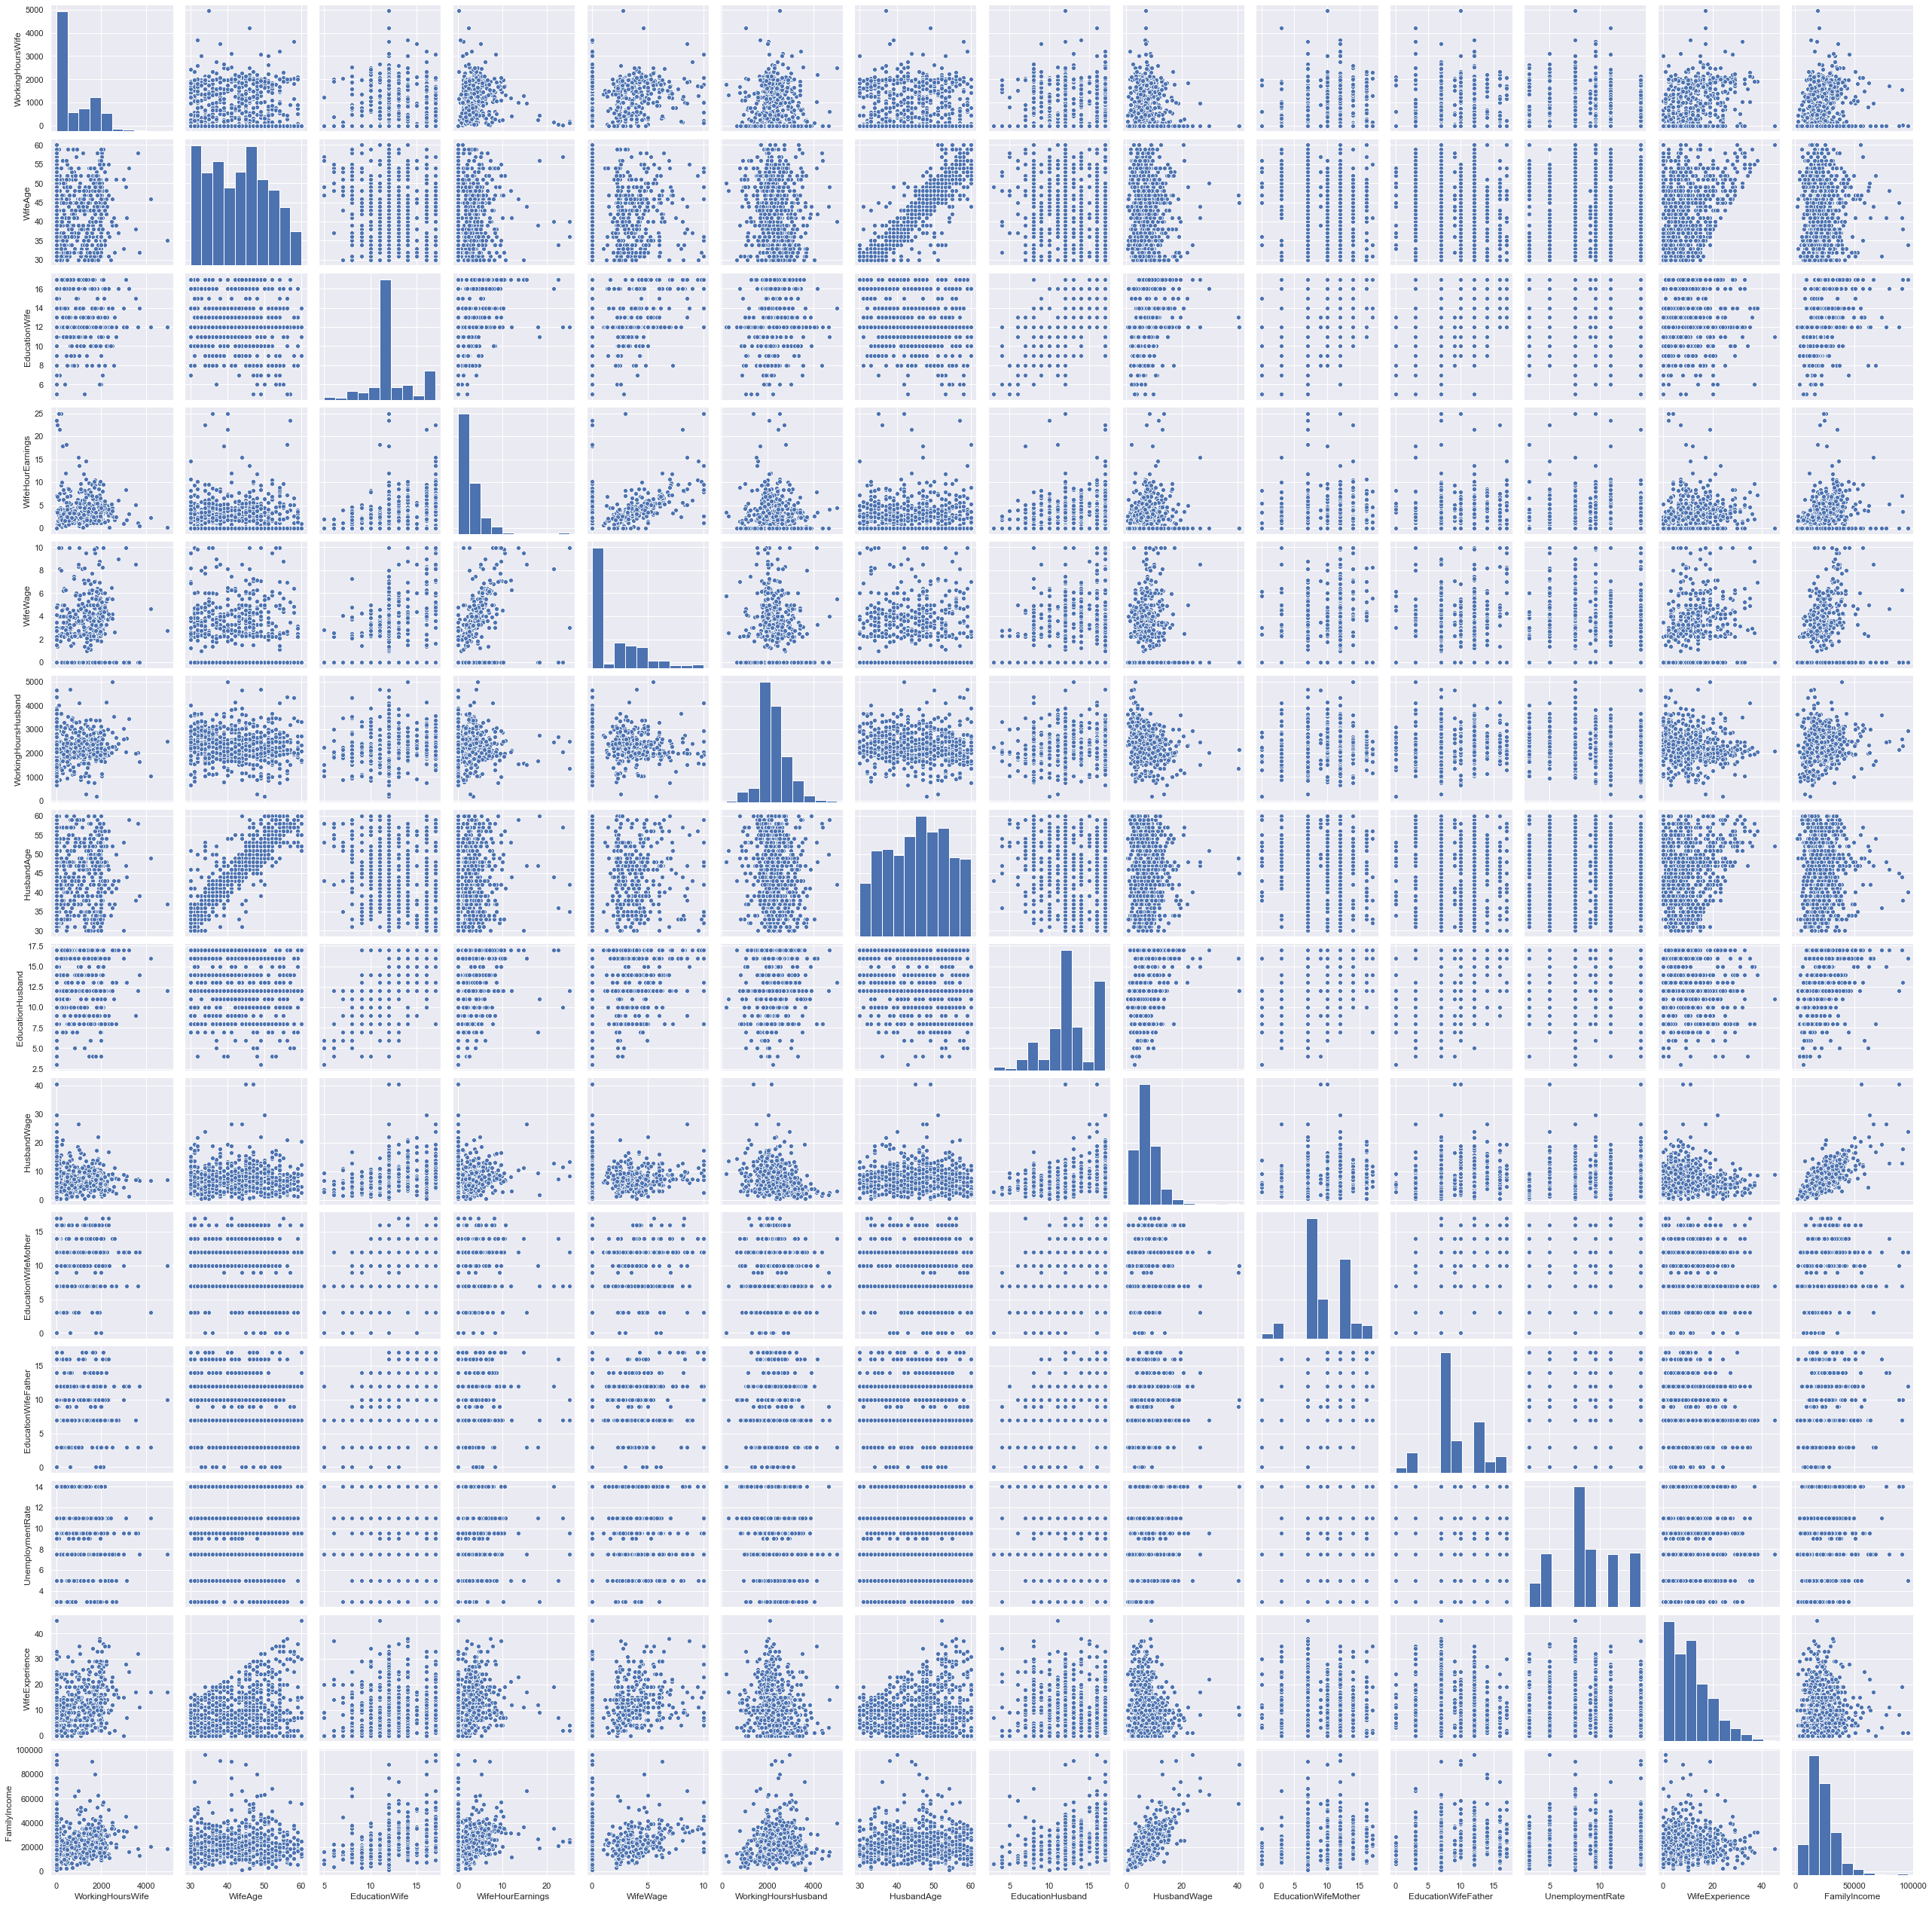

In [48]:
# WE will plot a pairplot to visualise corelation between independant variables

sns.pairplot(df)
plt.show()

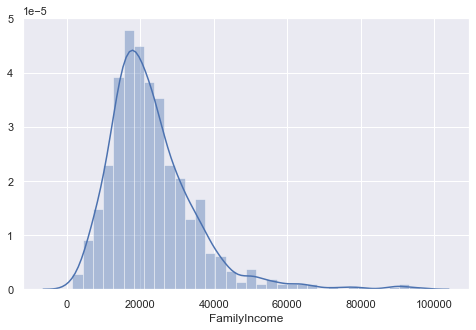

In [49]:
# Check whether the dependent variable is normally distributed(symetric)

plt.figure(figsize=(8,5))  #For adjusting the size of the histogram
sns.distplot(df['FamilyIncome'])
plt.show()

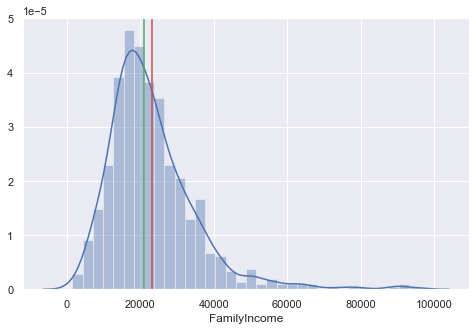

In [50]:
plt.figure(figsize=(8,5))  #For adjusting the size of the histogram
sns.distplot(df['FamilyIncome'])
plt.axvline(df['FamilyIncome'].mean(), color='r') #Red Line for Mean
plt.axvline(df['FamilyIncome'].median(), color='g') #Green line for Median
plt.show()

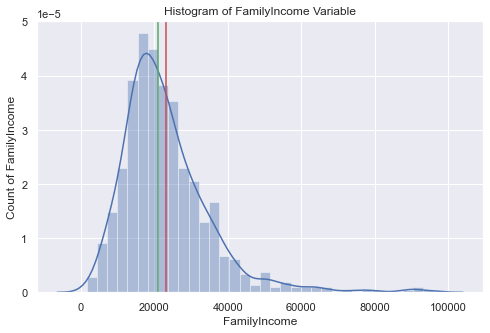

In [51]:
plt.figure(figsize=(8,5))  #For adjusting the size of the histogram
sns.distplot(df['FamilyIncome'])
plt.axvline(df['FamilyIncome'].mean(), color='r') #Red Line for Mean
plt.axvline(df['FamilyIncome'].median(), color='g') #Green line for Median
plt.xlabel("FamilyIncome")
plt.ylabel("Count of FamilyIncome")
plt.title("Histogram of FamilyIncome Variable")
plt.show()

#The distribution does not seem to be symmetric as the mean and median values are different for dependant variable.

Let us look at a scatterplot/ regplot between the Dependent Variable (FamilyIncome) and one Independent Variable (WifeAge) to check what kind of a relationship these variables exhibit. 
This can also be checked by running a simple linear regression model with these two variables. 

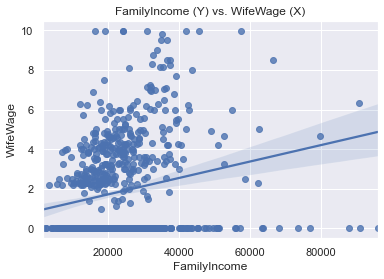

In [52]:
sns.regplot(df['FamilyIncome'], df['WifeWage'])
plt.title("FamilyIncome (Y) vs. WifeWage (X)")
plt.show()

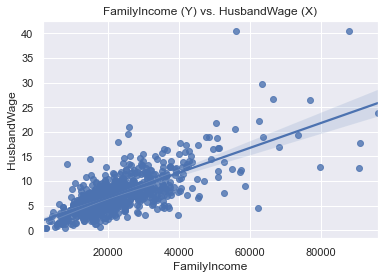

In [53]:
sns.regplot(df['FamilyIncome'], df['HusbandWage'])
plt.title("FamilyIncome (Y) vs. HusbandWage (X)")
plt.show()

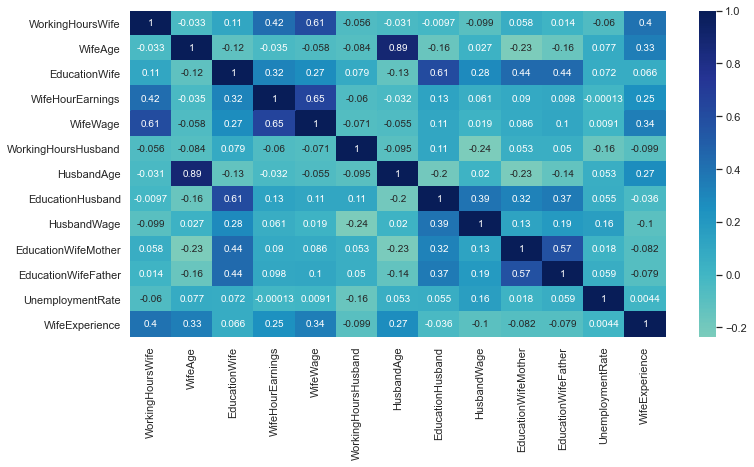

In [54]:
#Now, let us plot the correlation matrix in form of a heatmap to check the extent of multicollinearity between the independent varaibles.

plt.figure(figsize=(12,6))
sns.heatmap(df1.corr(),fmt='.2g',annot=True,center=0,cmap="YlGnBu")
plt.show()

#We see that there is some degree of correlation amongst the independant variables but no perfect correlation exists,

1.There are no variables with Perfectly Positive or Negative correlation.

2.Fairly Strong Positive Relationship
    
    #Wifes age and Husbands age.
    
3.Moderate Positive Relationship

    # Between Wife wage and Working hours wife.
    # Between Education Husband and Education Wife.
    # Between Wife wage and Wife Hour Earning.
    # Between Family Income and Husband Wage.
    # Between Education wife father and Education wife mother.
    
4.No corelation

    #Wife Experience and unemployment rate
    #Wife wage and unemployment rate
    #Wife Houe earnings and Unemployment Rate
    #Education husband and Working Hour Wife


# 2.3) Perform Multiple Linear Regression (using the 'statsmodels' library) and comment on the model thus built.

Before we get to the actual model building exercise, it is important to seperate the Independent variables (X) from the Dependent Variables (Y).

In [55]:
X=df.drop(['FamilyIncome'],axis=1)
Y=df['FamilyIncome']
names = list(X)
names

['WorkingHoursWife',
 'WifeAge',
 'EducationWife',
 'WifeHourEarnings',
 'WifeWage',
 'WorkingHoursHusband',
 'HusbandAge',
 'EducationHusband',
 'HusbandWage',
 'EducationWifeMother',
 'EducationWifeFather',
 'UnemploymentRate',
 'WifeExperience']

In [56]:
X.head()

,WorkingHoursWife,WifeAge,EducationWife,WifeHourEarnings,WifeWage,WorkingHoursHusband,HusbandAge,EducationHusband,HusbandWage,EducationWifeMother,EducationWifeFather,UnemploymentRate,WifeExperience
0,1610,32,12,3.3540,2.65,2708,34,12,4.0288,12,7,5.0,14
1,1656,30,12,1.3889,2.65,2310,30,9,8.4416,7,7,11.0,5
2,1980,35,12,4.5455,4.04,3072,40,12,3.5807,12,7,5.0,15
3,456,34,12,1.0965,3.25,1920,53,10,3.5417,7,7,5.0,6
4,1568,31,14,4.5918,3.60,2000,32,12,10.0000,12,14,9.5,7


In [57]:
Y.head()

0    16310
1    21800
2    21040
3     7300
4    27300
Name: FamilyIncome, dtype: int64

Let's also check the assumptions of Linear Regression.

**#Assumption 1: Independent Variables should not exhibit correlations.**

In [58]:
# Generating the correlation matrix for the Independent Variables.
X.corr()

,WorkingHoursWife,WifeAge,EducationWife,WifeHourEarnings,WifeWage,WorkingHoursHusband,HusbandAge,EducationHusband,HusbandWage,EducationWifeMother,EducationWifeFather,UnemploymentRate,WifeExperience
WorkingHoursWife,1.000000,-0.033114,0.105960,0.422944,0.606916,-0.056348,-0.031089,-0.009650,-0.098599,0.057864,0.013671,-0.060290,0.404959
WifeAge,-0.033114,1.000000,-0.120223,-0.034559,-0.058315,-0.084372,0.888138,-0.163049,0.027015,-0.234642,-0.160591,0.077077,0.334016
EducationWife,0.105960,-0.120223,1.000000,0.318378,0.267575,0.078916,-0.133522,0.611954,0.284936,0.435336,0.442458,0.072140,0.066256
WifeHourEarnings,0.422944,-0.034559,0.318378,1.000000,0.651641,-0.059919,-0.031836,0.126224,0.061290,0.090305,0.098477,-0.000128,0.250580
WifeWage,0.606916,-0.058315,0.267575,0.651641,1.000000,-0.070797,-0.055399,0.106967,0.019276,0.085598,0.102772,0.009124,0.341557
WorkingHoursHusband,-0.056348,-0.084372,0.078916,-0.059919,-0.070797,1.000000,-0.095387,0.107845,-0.236021,0.053354,0.050345,-0.155220,-0.099366
HusbandAge,-0.031089,0.888138,-0.133522,-0.031836,-0.055399,-0.095387,1.000000,-0.195323,0.019681,-0.227457,-0.135000,0.053094,0.271910
EducationHusband,-0.009650,-0.163049,0.611954,0.126224,0.106967,0.107845,-0.195323,1.000000,0.394665,0.324475,0.366700,0.055017,-0.036301
HusbandWage,-0.098599,0.027015,0.284936,0.061290,0.019276,-0.236021,0.019681,0.394665,1.000000,0.126736,0.193229,0.157920,-0.103306
EducationWifeMother,0.057864,-0.234642,0.435336,0.090305,0.085598,0.053354,-0.227457,0.324475,0.126736,1.000000,0.573072,0.018402,-0.082179


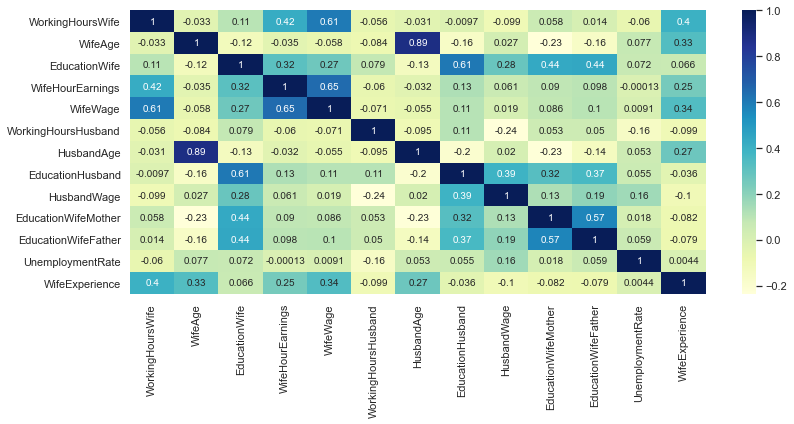

In [59]:
# A more visually intuitive way of checking correlations is to plot a heat map from the seaborn library.
plt.figure(figsize=(12,6))          
sns.heatmap(X.corr(),annot=True, cmap="YlGnBu")
plt.tight_layout()
plt.show()

#Here we can see that there is a fairly strong relation between WifeAge and HusbandAge but we assume that the primary objective is to make predictions and we don't want to understand the role of each independent variables hence severity of multicollinearity is ignored.
#So Assumption 1 holds true.

**Assumption 2: The dependent variable should be linearly related with the coefficients.**

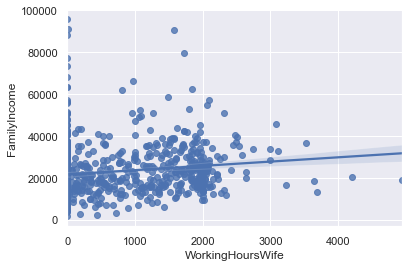

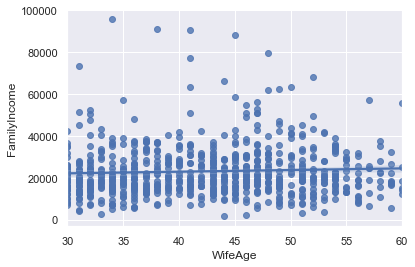

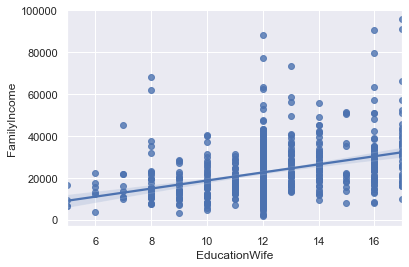

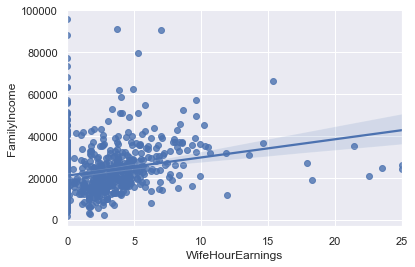

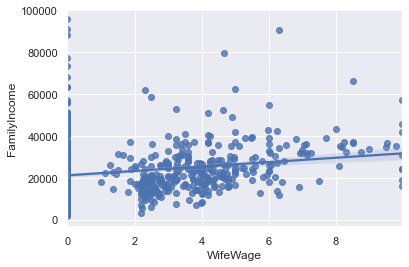

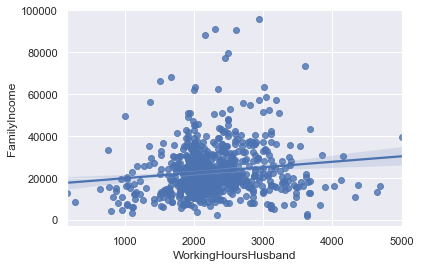

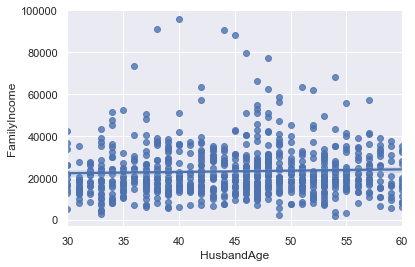

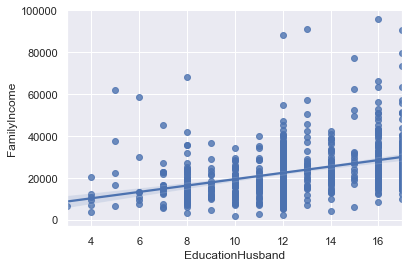

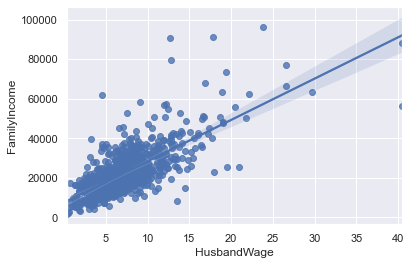

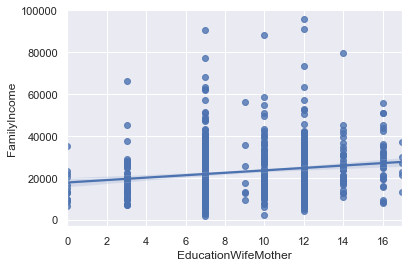

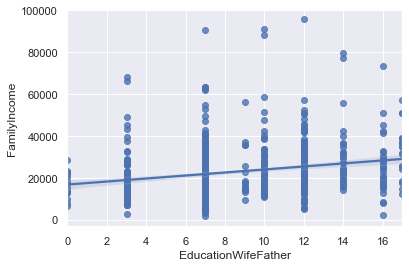

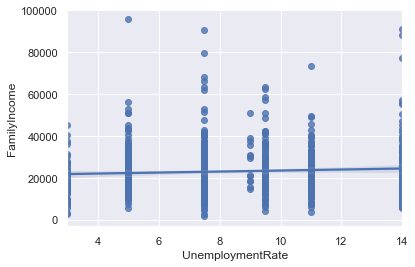

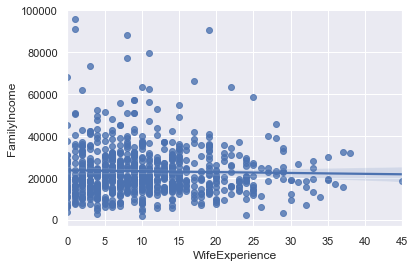

In [60]:
# Checking Linearity with all Variables using Regplot (Seaborn Library)

for names in X.columns:
    sns.regplot(X[names],Y)
    plt.show()

In [61]:
# Adding the constant term first
import statsmodels.api as sm
X_1=sm.add_constant(X)

In [62]:
X_1.head()

,const,WorkingHoursWife,WifeAge,EducationWife,WifeHourEarnings,WifeWage,WorkingHoursHusband,HusbandAge,EducationHusband,HusbandWage,EducationWifeMother,EducationWifeFather,UnemploymentRate,WifeExperience
0,1.0,1610,32,12,3.3540,2.65,2708,34,12,4.0288,12,7,5.0,14
1,1.0,1656,30,12,1.3889,2.65,2310,30,9,8.4416,7,7,11.0,5
2,1.0,1980,35,12,4.5455,4.04,3072,40,12,3.5807,12,7,5.0,15
3,1.0,456,34,12,1.0965,3.25,1920,53,10,3.5417,7,7,5.0,6
4,1.0,1568,31,14,4.5918,3.60,2000,32,12,10.0000,12,14,9.5,7


In [63]:
reg = sm.OLS(Y,X_1).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           FamilyIncome   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     135.9
Date:                Sat, 12 Dec 2020   Prob (F-statistic):          8.01e-186
Time:                        01:18:03   Log-Likelihood:                -7692.7
No. Observations:                 753   AIC:                         1.541e+04
Df Residuals:                     739   BIC:                         1.548e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -2.224e+04   2455.663     -9.057      0.000   -2.71e+04   -1.74e+04
WorkingHoursWife        2.7718      0.372      7.456      0.000       2.042       3.502
WifeAge               134.1663     68.226      1.967      0.050       0.227     268.106
EducationWife         375.2334    153.202      2.449      0.015      74.471     675.995
WifeHourEarnings      310.9829    101.621      3.060      0.002     111.482     510.484
WifeWage              277.4616    154.003      1.802      0.072     -24.875     579.798
WorkingHoursHusband     6.7790      0.441     15.356      0.000       5.912       7.646
HusbandAge             27.4612     66.582      0.412      0.680    -103.251     158.174
EducationHusband      -75.3354    110.423     -0.682      0.495    -292.115     141.444
HusbandWage          2286.1687     67.840     33.699      0.000    2152.986    2419.351
EducationWifeMother    31.6954     92.865      0.341      0.733    -150.616     214.007
EducationWifeFather    24.6254     87.378      0.282      0.778    -146.913     196.164
UnemploymentRate      -50.9882     80.405     -0.634      0.526    -208.838     106.862
WifeExperience       -107.5475     36.789     -2.923      0.004    -179.771     -35.323
==============================================================================
Omnibus:                      404.335   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5410.657
Skew:                           2.107   Prob(JB):                         0.00
Kurtosis:                      15.438   Cond. No.                     2.49e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

*The P-value for the analysis of variance F-test (P = 8.01e-186) suggests that the at least one of the beta coefficient is non zero in predicting the dependent variable.

**Assumption 3: Error terms should have a constant variance, i.e., Homoscedasticity.**

In [64]:
# Obtaining predictions
ypred = reg.predict(X_1)
print(ypred.head())
df1['pred'] = ypred

0    19184.922034
1    26443.029416
2    22869.522847
3    10637.964287
4    29825.819372
dtype: float64


In [65]:
# Generating the error column
df1['error'] = Y - ypred
df1.head()

,WorkingHoursWife,WifeAge,EducationWife,WifeHourEarnings,WifeWage,WorkingHoursHusband,HusbandAge,EducationHusband,HusbandWage,EducationWifeMother,EducationWifeFather,UnemploymentRate,WifeExperience,pred,error
0,1610,32,12,3.3540,2.65,2708,34,12,4.0288,12,7,5.0,14,19184.922034,-2874.922034
1,1656,30,12,1.3889,2.65,2310,30,9,8.4416,7,7,11.0,5,26443.029416,-4643.029416
2,1980,35,12,4.5455,4.04,3072,40,12,3.5807,12,7,5.0,15,22869.522847,-1829.522847
3,456,34,12,1.0965,3.25,1920,53,10,3.5417,7,7,5.0,6,10637.964287,-3337.964287
4,1568,31,14,4.5918,3.60,2000,32,12,10.0000,12,14,9.5,7,29825.819372,-2525.819372


We will first plot the Residuals (or errors) against the Predicted value (Y-hat).

Typically, if there is any hint of Heteroscadasticity between the Residuals and Predicted scores, as a second level of analysis, we should be looking at the residuals against each X variable to isolate the problem variables(s) causing this problem and come up with a course of action.

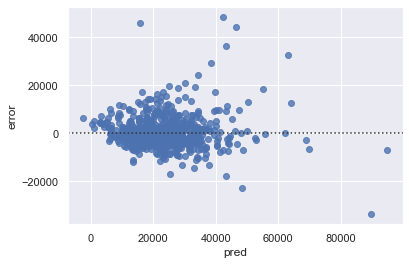

In [66]:
plt.show(sns.residplot(df1['pred'],df1['error']))

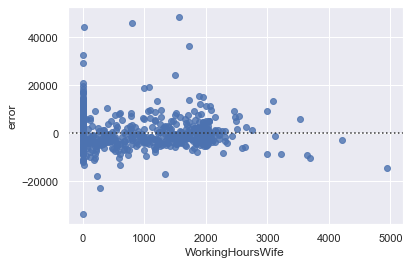

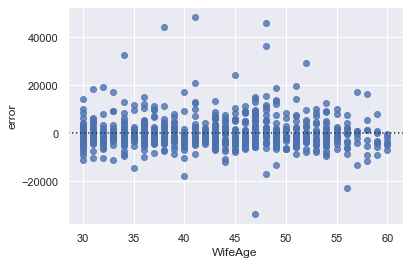

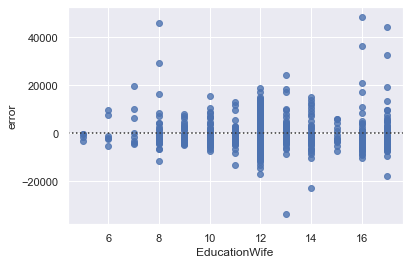

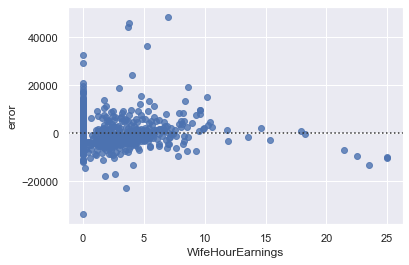

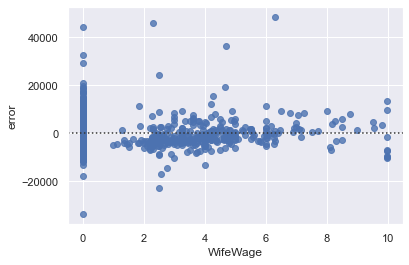

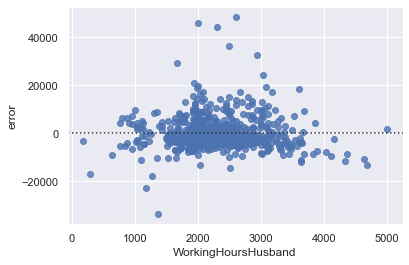

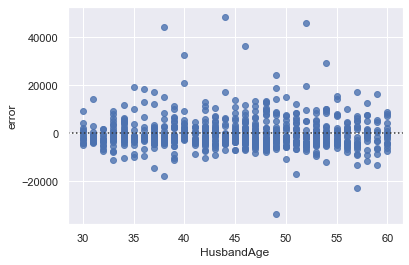

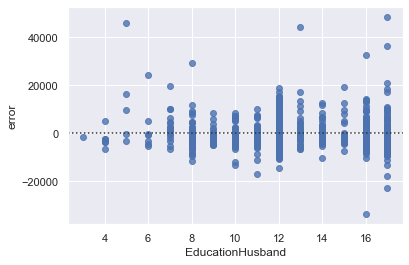

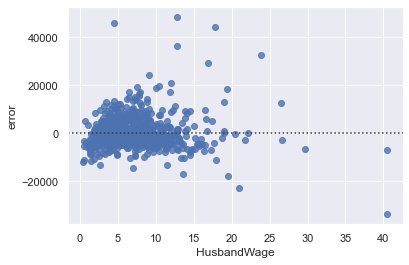

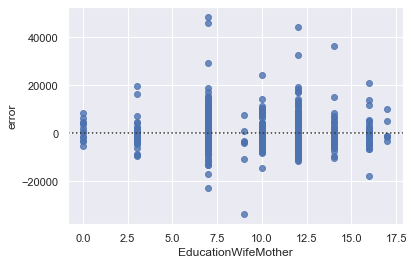

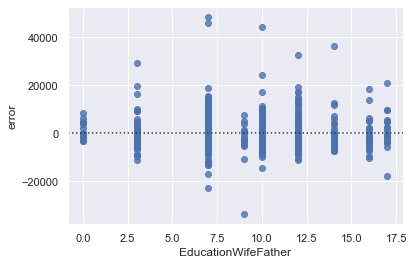

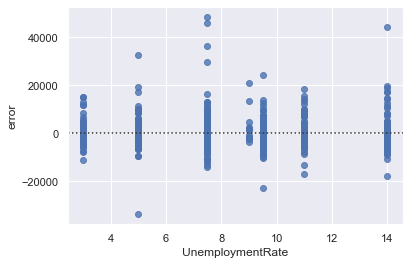

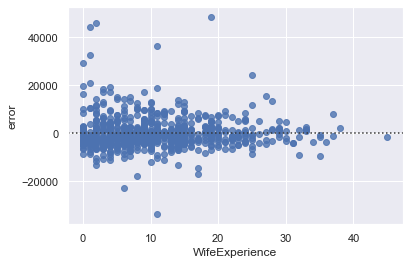

In [67]:
for names in range(0,len(X.columns)):
    sns.residplot(X.iloc[:,names],df1['error'])
    plt.show()

Visually, the residuals does not seem homoscedastic.

**Assumption 4: There should not be any auto-correlation between the error terms. (One value of the error term should not predict the next value of the error term)**

In [68]:
print('The variation in the independent variable which is explained by the dependent variables is','\n',
      reg.rsquared*100,'%')

The variation in the independent variable which is explained by the dependent variables is 
 70.50868822822953 %


In [69]:
# Checking Dubrin Watson test
import statsmodels

statsmodels.stats.stattools.durbin_watson(df1['error'], axis=0)

2.073207063867934

Here, we see that the Durbin-Watson test statistic is 2 and thus we can say that this particular assumption of Linear Regression is also verified.

**Assumption 5: Errors are normally distributed.**

Let us check the Shapiro test of normality to check whether the errors are normally distributed.

In [70]:
from scipy.stats import shapiro
shapiro(df1['error'])

(0.8269937038421631, 9.731716305268925e-28)

## Hypothesis for Shapiro Test

#### *****Ho :The distribution is normal                       ***** Ha :The distribution is not normal
Since the p-value is less than $\alpha$ (0.05), we can say that the errors are not normally distributed and this particular assumption does not hold true.

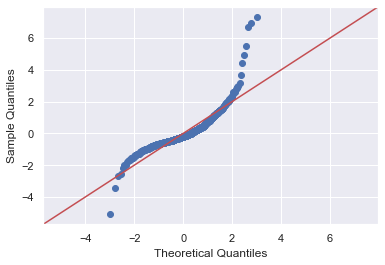

In [71]:
res = df1['error']
fig = sm.qqplot(res,fit=True,line='45')
plt.show()

#Using the QQ plot we can say that the Residuals (or errors) are normally distributed.


# 2.4) Perform Principal Component Analysis (on the predictor variables) and extract the Principal Components. Comment on the reason behind choosing the number of Principal Components.

In [72]:
# Since, we will be doing Principal Component Analysis on the data to reduce the dimensions let us go ahead and drop the target variable 'FamilyIncomme'.

df1.head()

,WorkingHoursWife,WifeAge,EducationWife,WifeHourEarnings,WifeWage,WorkingHoursHusband,HusbandAge,EducationHusband,HusbandWage,EducationWifeMother,EducationWifeFather,UnemploymentRate,WifeExperience,pred,error
0,1610,32,12,3.3540,2.65,2708,34,12,4.0288,12,7,5.0,14,19184.922034,-2874.922034
1,1656,30,12,1.3889,2.65,2310,30,9,8.4416,7,7,11.0,5,26443.029416,-4643.029416
2,1980,35,12,4.5455,4.04,3072,40,12,3.5807,12,7,5.0,15,22869.522847,-1829.522847
3,456,34,12,1.0965,3.25,1920,53,10,3.5417,7,7,5.0,6,10637.964287,-3337.964287
4,1568,31,14,4.5918,3.60,2000,32,12,10.0000,12,14,9.5,7,29825.819372,-2525.819372


In [73]:
# Let us drop 'pred' column

df1 = df1.drop('pred',axis=1)
df1.head()

,WorkingHoursWife,WifeAge,EducationWife,WifeHourEarnings,WifeWage,WorkingHoursHusband,HusbandAge,EducationHusband,HusbandWage,EducationWifeMother,EducationWifeFather,UnemploymentRate,WifeExperience,error
0,1610,32,12,3.3540,2.65,2708,34,12,4.0288,12,7,5.0,14,-2874.922034
1,1656,30,12,1.3889,2.65,2310,30,9,8.4416,7,7,11.0,5,-4643.029416
2,1980,35,12,4.5455,4.04,3072,40,12,3.5807,12,7,5.0,15,-1829.522847
3,456,34,12,1.0965,3.25,1920,53,10,3.5417,7,7,5.0,6,-3337.964287
4,1568,31,14,4.5918,3.60,2000,32,12,10.0000,12,14,9.5,7,-2525.819372


In [74]:
#Let us drop 'error' column

df1 = df1.drop('error',axis=1)
df1.head()

,WorkingHoursWife,WifeAge,EducationWife,WifeHourEarnings,WifeWage,WorkingHoursHusband,HusbandAge,EducationHusband,HusbandWage,EducationWifeMother,EducationWifeFather,UnemploymentRate,WifeExperience
0,1610,32,12,3.3540,2.65,2708,34,12,4.0288,12,7,5.0,14
1,1656,30,12,1.3889,2.65,2310,30,9,8.4416,7,7,11.0,5
2,1980,35,12,4.5455,4.04,3072,40,12,3.5807,12,7,5.0,15
3,456,34,12,1.0965,3.25,1920,53,10,3.5417,7,7,5.0,6
4,1568,31,14,4.5918,3.60,2000,32,12,10.0000,12,14,9.5,7


In [75]:
# Some variables are not on same scale,basically working hours,unemployment rate and family income 
# hence we need to do scaling to standardize the process.

from scipy.stats import zscore
data_scaled=df1.apply(zscore)
data_scaled.head()

,WorkingHoursWife,WifeAge,EducationWife,WifeHourEarnings,WifeWage,WorkingHoursHusband,HusbandAge,EducationHusband,HusbandWage,EducationWifeMother,EducationWifeFather,UnemploymentRate,WifeExperience
0,0.998493,-1.306257,-0.125883,0.302325,0.330924,0.740508,-1.380882,-0.162769,-0.816836,0.816884,-0.506669,-1.164042,0.417818
1,1.051322,-1.554174,-0.125883,-0.304248,0.330924,0.071793,-1.877564,-1.156543,0.226934,-0.668898,-0.506669,0.763443,-0.698285
2,1.423422,-0.934381,-0.125883,0.670109,0.905712,1.352097,-0.635859,-0.162769,-0.922827,0.816884,-0.506669,-1.164042,0.541830
3,-0.326823,-1.058339,-0.125883,-0.394504,0.579034,-0.583481,0.978358,-0.825285,-0.932051,-0.668898,-0.506669,-1.164042,-0.574274
4,0.950258,-1.430215,0.751799,0.684400,0.723765,-0.449066,-1.629223,-0.162769,0.595547,0.816884,1.454161,0.281572,-0.450262


# PCA

#Step 1: Before we go ahead and perform the Principal Component Analysis, let us build the covariance matrix.

In [76]:
cov_matrix = np.cov(data_scaled.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00132979e+00 -3.31582115e-02  1.06101321e-01  4.23506899e-01
   6.07723445e-01 -5.64225183e-02 -3.11300884e-02 -9.66326289e-03
  -9.87300540e-02  5.79406915e-02  1.36890778e-02 -6.03700052e-02
   4.05497226e-01]
 [-3.31582115e-02  1.00132979e+00 -1.20382861e-01 -3.46051004e-02
  -5.83924775e-02 -8.44837698e-02  8.89319009e-01 -1.63266264e-01
   2.70507312e-02 -2.34953587e-01 -1.60804404e-01  7.71793469e-02
   3.34460049e-01]
 [ 1.06101321e-01 -1.20382861e-01  1.00132979e+00  3.18801449e-01
   2.67930359e-01  7.90208661e-02 -1.33699059e-01  6.12767546e-01
   2.85315019e-01  4.35915402e-01  4.43046609e-01  7.22359587e-02
   6.63436673e-02]
 [ 4.23506899e-01 -3.46051004e-02  3.18801449e-01  1.00132979e+00
   6.52507648e-01 -5.99985405e-02 -3.18782667e-02  1.26391585e-01
   6.13711932e-02  9.04253051e-02  9.86077958e-02 -1.27896664e-04
   2.50913296e-01]
 [ 6.07723445e-01 -5.83924775e-02  2.67930359e-01  6.52507648e-01
   1.00132979e+00 -7.08913431e-02 -5.5472531

In [77]:
# Step 2: Let us now get the eigen values and the eigen vectors.

eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n', eig_vecs)
print('\n Eigen Values \n', eig_vals)

Eigen Vectors 
 [[-0.17742383  0.42818966  0.27289732 -0.01800772  0.10248336 -0.04906251
  -0.02140832  0.16921007 -0.5533919  -0.38195272 -0.14860013 -0.43375229
  -0.07761001]
 [ 0.2686461   0.32073721 -0.46948303  0.24081122  0.00652029 -0.01636776
  -0.71604282 -0.12039671 -0.01878517  0.00937483  0.06594523 -0.1174905
   0.02087811]
 [-0.44361296  0.02791376 -0.21775337  0.14759737 -0.16389846  0.10670115
  -0.00704313  0.07993251  0.37441051  0.06785842 -0.68811238 -0.26211575
   0.03935585]
 [-0.2760925   0.38312234  0.13260116 -0.08785453 -0.15014214  0.05824887
  -0.00248872 -0.50545136  0.34121163 -0.48969245  0.16968773  0.24980465
   0.15114727]
 [-0.27877776  0.43697551  0.20093792 -0.09615522 -0.04139521  0.05283352
  -0.01433441 -0.2293794  -0.0947791   0.76645265  0.12449233 -0.00541794
  -0.1114797 ]
 [-0.03355309 -0.13593613  0.16562636  0.65079552 -0.23533967  0.49972219
   0.01506437 -0.13060046 -0.35680902  0.00489237 -0.05394212  0.23643394
   0.14453663]
 [ 0.27

In [78]:
# Let us now print the first eigen vector

print('The first eigen vector is:')
counter = 0
for i in range(0,len(eig_vecs[0])):
    counter = counter+1
    if(counter != (len(eig_vecs[0]))):
        print(eig_vecs[0,i],'*',df1.columns[i],"+")
    else:
        print(eig_vecs[0,i],'*',df1.columns[i])

The first eigen vector is:
-0.1774238305900589 * WorkingHoursWife +
0.4281896635707349 * WifeAge +
0.2728973218713128 * EducationWife +
-0.018007718341326275 * WifeHourEarnings +
0.10248336136839901 * WifeWage +
-0.04906251184433848 * WorkingHoursHusband +
-0.0214083238754673 * HusbandAge +
0.16921007110409816 * EducationHusband +
-0.5533919025044572 * HusbandWage +
-0.3819527174012652 * EducationWifeMother +
-0.14860012597330977 * EducationWifeFather +
-0.4337522897135038 * UnemploymentRate +
-0.07761001138243577 * WifeExperience


In [79]:
# Step 3: Let us now calculate the variance explained by eigen values and the cumulative variance by 
# the eigen values(TOTAL VARIATION).

tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
print('The variance explained by each of eigen values in order is ',var_exp)


The variance explained by each of eigen values in order is  [22.909952727776243, 18.51644154604998, 13.717349758794818, 9.490342942168791, 7.1422449686941984, 6.606157297491231, 5.306910765021297, 4.1489013600324816, 3.3926663131857118, 3.227152513087366, 2.494676606741439, 2.2271463835985834, 0.8200568173578529]


In [80]:
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 22.90995273  41.42639427  55.14374403  64.63408697  71.77633194
  78.38248924  83.68940001  87.83830137  91.23096768  94.45812019
  96.9527968   99.17994318 100.        ]


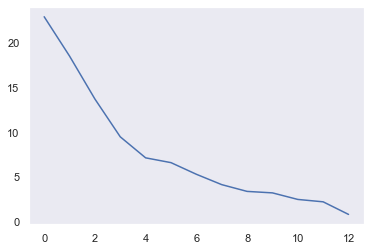

In [81]:
# Step 4: Let us now plot the variance explained by each eigen value with the eigen value.

plt.plot(var_exp)
plt.grid()

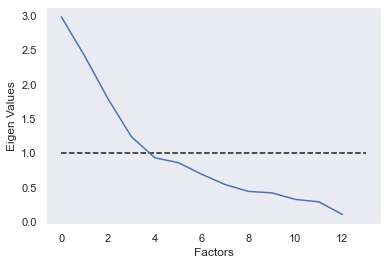

In [82]:
# Plot of eigen values with the number of factors or Principal Components

plt.plot(range(0,13),sorted(eig_vals, reverse=True))
plt.grid()
plt.ylabel('Eigen Values')
plt.xlabel('Factors')
plt.hlines(y=1,xmin=0,xmax=13,linestyles='dashed');

In [83]:
print('From the above plot, we can see that the number of components that we can probably take is 5.','\n'
      'We also see that if we take 5 components the total amount of variance explained is',cum_var_exp[4],'%')

From the above plot, we can see that the number of components that we can probably take is 5. 
We also see that if we take 5 components the total amount of variance explained is 71.77633194348402 %


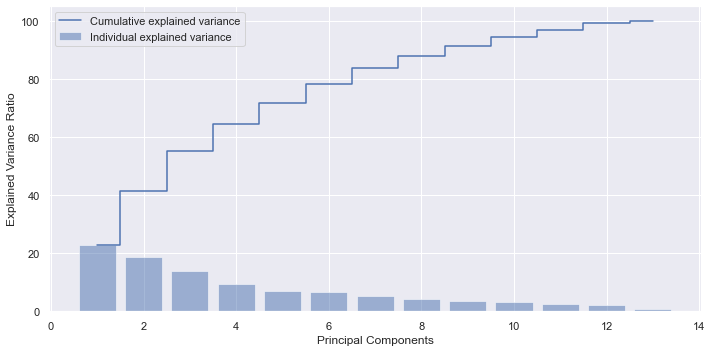

In [84]:
# Let us now plot one more graph with both the variance explained by each eigen value and the cumulative variance explained.

plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

**# Step 5: Let us now calculate the Principal Components.**

In [116]:
df.head()

,WorkingHoursWife,WifeAge,EducationWife,WifeHourEarnings,WifeWage,WorkingHoursHusband,HusbandAge,EducationHusband,HusbandWage,EducationWifeMother,EducationWifeFather,UnemploymentRate,WifeExperience,FamilyIncome
0,1610,32,12,3.3540,2.65,2708,34,12,4.0288,12,7,5.0,14,16310
1,1656,30,12,1.3889,2.65,2310,30,9,8.4416,7,7,11.0,5,21800
2,1980,35,12,4.5455,4.04,3072,40,12,3.5807,12,7,5.0,15,21040
3,456,34,12,1.0965,3.25,1920,53,10,3.5417,7,7,5.0,6,7300
4,1568,31,14,4.5918,3.60,2000,32,12,10.0000,12,14,9.5,7,27300


In [86]:
from statsmodels.multivariate.pca import PCA

In [87]:
pc = PCA(df1, 
         ncomp=5,)

In [88]:
    df1_comp = pc.loadings.T
df1_comp

,WorkingHoursWife,WifeAge,EducationWife,WifeHourEarnings,WifeWage,WorkingHoursHusband,HusbandAge,EducationHusband,HusbandWage,EducationWifeMother,EducationWifeFather,UnemploymentRate,WifeExperience
comp_0,-0.177424,0.268646,-0.443613,-0.276092,-0.278778,-0.033553,0.271126,-0.390302,-0.196630,-0.375744,-0.371109,-0.032692,-0.002222
comp_1,0.428190,0.320737,0.027914,0.383122,0.436976,-0.135936,0.309796,-0.101359,-0.056855,-0.132936,-0.113332,0.014807,0.465379
comp_2,-0.272897,0.469483,0.217753,-0.132601,-0.200938,-0.165626,0.459676,0.252043,0.418032,0.099204,0.199590,0.268341,0.032294
comp_3,0.018008,-0.240811,-0.147597,0.087855,0.096155,-0.650796,-0.240164,-0.079821,0.375879,-0.204903,-0.204439,0.417127,-0.127637
comp_4,-0.102483,-0.006520,0.163898,0.150142,0.041395,0.235340,-0.031756,0.402812,0.378446,-0.491863,-0.431441,-0.376111,-0.083269


In [89]:
# Reduced dimension data

df1_reduced_dimension = pc.factors
df1_reduced_dimension.head()

,comp_0,comp_1,comp_2,comp_3,comp_4
0,-0.019107,-0.001738,-0.067640,-0.020916,0.000299
1,-0.005178,-0.015930,-0.058042,0.054033,-0.005109
2,-0.019851,0.019512,-0.065041,-0.041485,0.004189
3,0.022086,-0.000003,-0.028621,-0.000746,0.006209
4,-0.055158,-0.009212,-0.028315,0.033167,-0.031157


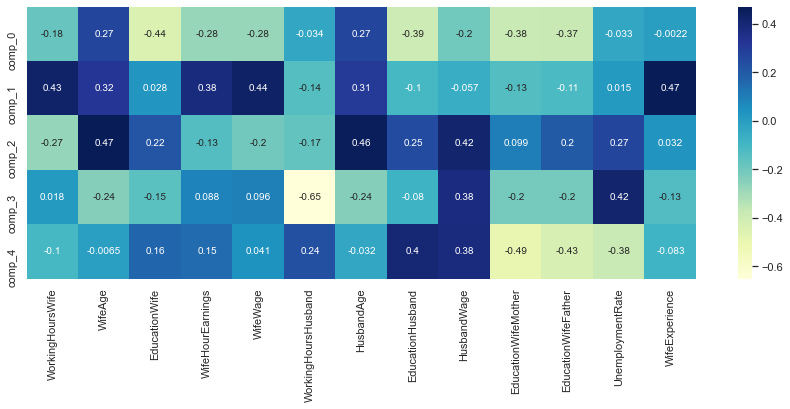

In [90]:
plt.figure(figsize=(15,5))
sns.heatmap(df1_comp,annot=True,cmap="YlGnBu")
plt.show()
#sns.heatmap(pc.factors.corr(),annot=True,mask=np.triu(pc.factors.corr(),+1),fmt='.5g');

#Now, we see that the correlation amongst the variables have been decreased.

In [91]:
FinalDimensions = pc.factors
print(FinalDimensions)

       comp_0    comp_1    comp_2    comp_3    comp_4
0   -0.019107 -0.001738 -0.067640 -0.020916  0.000299
1   -0.005178 -0.015930 -0.058042  0.054033 -0.005109
2   -0.019851  0.019512 -0.065041 -0.041485  0.004189
3    0.022086 -0.000003 -0.028621 -0.000746  0.006209
4   -0.055158 -0.009212 -0.028315  0.033167 -0.031157
..        ...       ...       ...       ...       ...
748 -0.011036 -0.043570  0.018679 -0.023769  0.023900
749 -0.012681 -0.042950 -0.026546  0.000932 -0.041150
750  0.030714 -0.028260 -0.021012 -0.017246  0.005202
751  0.025802  0.008736  0.083174  0.017224 -0.075196
752  0.035470 -0.022837 -0.006708 -0.013991  0.003549

[753 rows x 5 columns]


In [92]:
FinalDimensions.columns = ['Wife Age & Education','Wife Experience and Wife Mother Education','Working Hours and Age Wife','Unemployment and working Hrs Husband','EducationWifeMother and EducationHusband']
print(FinalDimensions)

     Wife Age & Education  Wife Experience and Wife Mother Education  \
0               -0.019107                                  -0.001738   
1               -0.005178                                  -0.015930   
2               -0.019851                                   0.019512   
3                0.022086                                  -0.000003   
4               -0.055158                                  -0.009212   
..                    ...                                        ...   
748             -0.011036                                  -0.043570   
749             -0.012681                                  -0.042950   
750              0.030714                                  -0.028260   
751              0.025802                                   0.008736   
752              0.035470                                  -0.022837   

     Working Hours and Age Wife  Unemployment and working Hrs Husband  \
0                     -0.067640                             -0

In [93]:
FinalDimensions.to_csv('IncomePCA.csv')

# 2.5) Perform Multiple Linear Regression with 'FamilyIncome' as the dependent variable and the Principal Components extracted as the independent variables.

In [94]:
# Print Final dimensions

df2=FinalDimensions

In [95]:
df2

,Wife Age & Education,Wife Experience and Wife Mother Education,Working Hours and Age Wife,Unemployment and working Hrs Husband,EducationWifeMother and EducationHusband
0,-0.019107,-0.001738,-0.067640,-0.020916,0.000299
1,-0.005178,-0.015930,-0.058042,0.054033,-0.005109
2,-0.019851,0.019512,-0.065041,-0.041485,0.004189
3,0.022086,-0.000003,-0.028621,-0.000746,0.006209
4,-0.055158,-0.009212,-0.028315,0.033167,-0.031157
...,...,...,...,...,...
748,-0.011036,-0.043570,0.018679,-0.023769,0.023900
749,-0.012681,-0.042950,-0.026546,0.000932,-0.041150
750,0.030714,-0.028260,-0.021012,-0.017246,0.005202
751,0.025802,0.008736,0.083174,0.017224,-0.075196


In [96]:
# Add a column familyincome

familyincome=df['FamilyIncome']
familyincome

0      16310
1      21800
2      21040
3       7300
4      27300
       ...  
748    28200
749    10000
750     9952
751    24984
752    28363
Name: FamilyIncome, Length: 753, dtype: int64

In [97]:
df2['familyincome']= familyincome

In [98]:
# Check the tail
df2.tail()

,Wife Age & Education,Wife Experience and Wife Mother Education,Working Hours and Age Wife,Unemployment and working Hrs Husband,EducationWifeMother and EducationHusband,familyincome
748,-0.011036,-0.043570,0.018679,-0.023769,0.023900,28200
749,-0.012681,-0.042950,-0.026546,0.000932,-0.041150,10000
750,0.030714,-0.028260,-0.021012,-0.017246,0.005202,9952
751,0.025802,0.008736,0.083174,0.017224,-0.075196,24984
752,0.035470,-0.022837,-0.006708,-0.013991,0.003549,28363


In [99]:
df2.head()

,Wife Age & Education,Wife Experience and Wife Mother Education,Working Hours and Age Wife,Unemployment and working Hrs Husband,EducationWifeMother and EducationHusband,familyincome
0,-0.019107,-0.001738,-0.067640,-0.020916,0.000299,16310
1,-0.005178,-0.015930,-0.058042,0.054033,-0.005109,21800
2,-0.019851,0.019512,-0.065041,-0.041485,0.004189,21040
3,0.022086,-0.000003,-0.028621,-0.000746,0.006209,7300
4,-0.055158,-0.009212,-0.028315,0.033167,-0.031157,27300


In [100]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753 entries, 0 to 752
Data columns (total 6 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Wife Age & Education                       753 non-null    float64
 1   Wife Experience and Wife Mother Education  753 non-null    float64
 2   Working Hours and Age Wife                 753 non-null    float64
 3   Unemployment and working Hrs Husband       753 non-null    float64
 4   EducationWifeMother and EducationHusband   753 non-null    float64
 5   familyincome                               753 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 35.4 KB


In [101]:
from scipy.stats import zscore
data_scaled=df2.apply(zscore)
data_scaled.head()

,Wife Age & Education,Wife Experience and Wife Mother Education,Working Hours and Age Wife,Unemployment and working Hrs Husband,EducationWifeMother and EducationHusband,familyincome
0,-0.524308,-0.047681,-1.856089,-0.573941,0.008194,-0.555782
1,-0.142077,-0.437131,-1.592714,1.482707,-0.140184,-0.105121
2,-0.544722,0.535437,-1.784774,-1.138370,0.114956,-0.167508
3,0.606058,-0.000079,-0.785382,-0.020476,0.170387,-1.295391
4,-1.513572,-0.252778,-0.776986,0.910123,-0.854977,0.346361


In [102]:
X = df2[['Wife Age & Education','Wife Experience and Wife Mother Education','Working Hours and Age Wife','Unemployment and working Hrs Husband','EducationWifeMother and EducationHusband']]
Y = df2['familyincome']

In [103]:
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:           familyincome   R-squared:                       0.437
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     115.8
Date:                Sat, 12 Dec 2020   Prob (F-statistic):           1.34e-90
Time:                        01:18:08   Log-Likelihood:                -7936.4
No. Observations:                 753   AIC:                         1.588e+04
Df Residuals:                     747   BIC:                         1.591e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

**Assumption 1: Independent Variables should not exhibit correlations.**



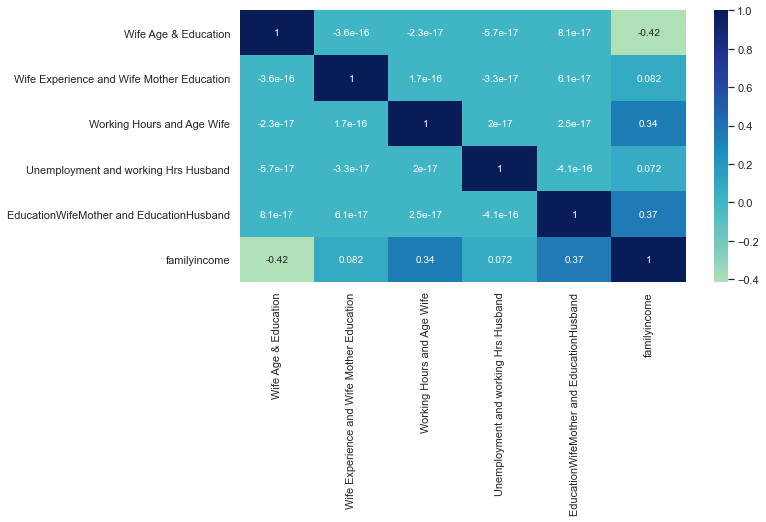

In [104]:
plt.figure(figsize=(10,5))
sns.heatmap(df2.corr(),fmt='.2g',annot=True,center=0,cmap="YlGnBu")
plt.show()

**#The independent variables don't exhibit very high correlations amongst themselves. 
**#So this assumption holds true.

**Assumption 2: The dependent variable should be linearly related with the coefficients.**

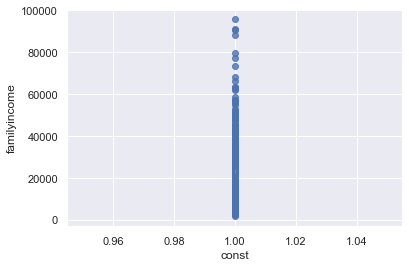

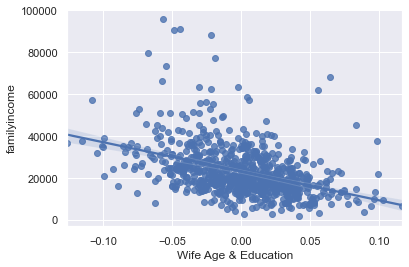

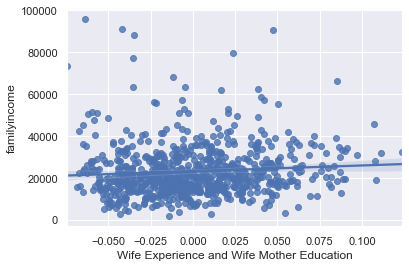

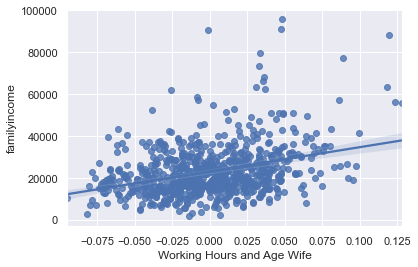

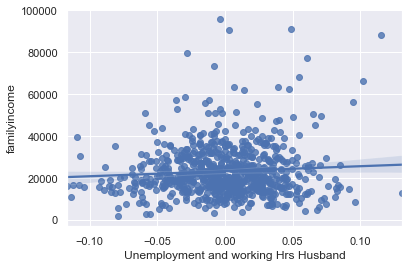

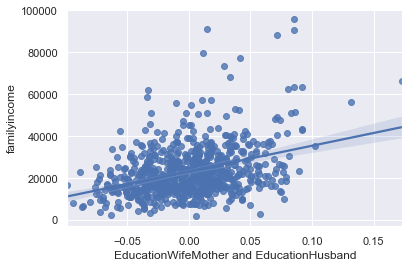

In [105]:
# Checking Linearity with all Variables using Regplot (Seaborn Library)

for names in X.columns:
    sns.regplot(X[names],Y)
    plt.show()
    

#It can be seen that linear relation exists between dependant and independant variables.

**Assumption 3: Error terms should have a constant variance, i.e., Homoscedasticity.**

In [106]:
ypred = model.predict(X)
print(ypred)

0      17437.028369
1      17352.089161
2      18406.654876
3      17456.275198
4      24226.267335
           ...     
748    27910.709059
749    15604.830966
750    15836.135636
751    20546.643146
752    16847.422683
Length: 753, dtype: float64


In [107]:
df2['ypred'] = ypred

In [108]:
df2['error'] = Y - ypred
df2.head()

,Wife Age & Education,Wife Experience and Wife Mother Education,Working Hours and Age Wife,Unemployment and working Hrs Husband,EducationWifeMother and EducationHusband,familyincome,ypred,error
0,-0.019107,-0.001738,-0.067640,-0.020916,0.000299,16310,17437.028369,-1127.028369
1,-0.005178,-0.015930,-0.058042,0.054033,-0.005109,21800,17352.089161,4447.910839
2,-0.019851,0.019512,-0.065041,-0.041485,0.004189,21040,18406.654876,2633.345124
3,0.022086,-0.000003,-0.028621,-0.000746,0.006209,7300,17456.275198,-10156.275198
4,-0.055158,-0.009212,-0.028315,0.033167,-0.031157,27300,24226.267335,3073.732665


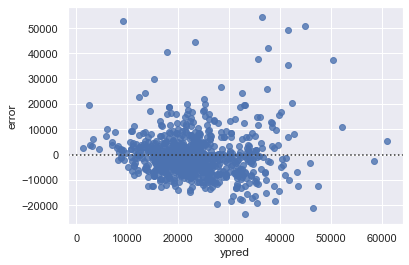

In [109]:
sns.residplot(df2['ypred'],df2['error'])

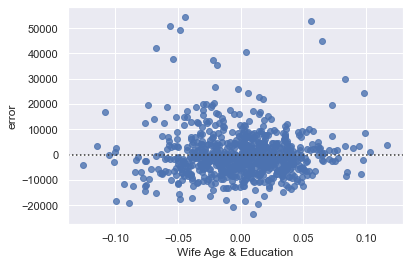

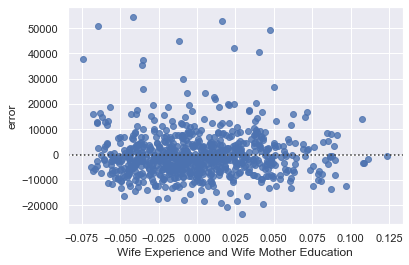

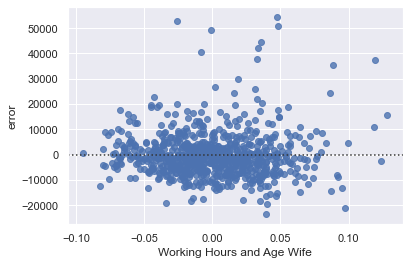

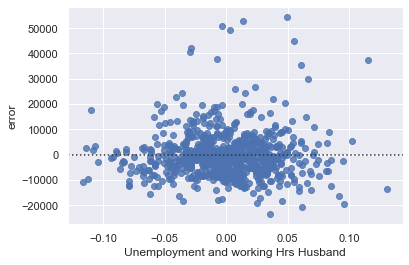

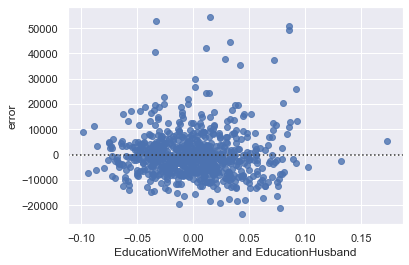

In [110]:
for names in range(1,len(X.columns)):
    sns.residplot(X.iloc[:,names],df2['error'])
    plt.show()

Visually, the residuals doesn't seem homoscedastic.

**Assumption 4: There should not be any auto-correlation between the error terms. (One value of the error term should not predict the next value of the error term)**

In [111]:
import statsmodels

statsmodels.stats.stattools.durbin_watson(df2['error'], axis=0)

1.9545786263692557

#The Durbin-Watson test statistic ranges from a value of 0 to 4. Wheverver the statistic is exactly equal to 2, we can go ahead and say that there is zero autocorrelation. However, as a thumb rule if this statistics lies between 1.5-2.5, the model may still be deployed.

**#Assumption 5: Errors are normally distributed.**

In [112]:
df2['error']

0      -1127.028369
1       4447.910839
2       2633.345124
3     -10156.275198
4       3073.732665
           ...     
748      289.290941
749    -5604.830966
750    -5884.135636
751     4437.356854
752    11515.577317
Name: error, Length: 753, dtype: float64

In [113]:
from scipy.stats import shapiro
shapiro(np.abs(df2['error']))

(0.7212235331535339, 1.398379559175213e-33)

#Hypothesis for Shapiro Test
*Ho :The distribution is normal * Ha :The distribution is not normal
Since the p-value is less than α (0.05), we can say that the errors are not normally distributed and this particular assumption does not hold true.

In [114]:
res = model.resid

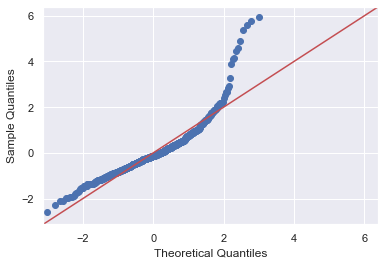

In [115]:
fig = sm.qqplot(res,fit=True,line='45')
plt.show()

#Using the QQ plot we can say that the Residuals (or errors) are normally distributed.

# 2.6) Comment on the Model thus built using the Principal Components and with 'FamilyIncome'.

Interpretation of the principal components is based on finding which variables are most strongly correlated with each component, i.e., which of these numbers are large in magnitude, the farthest from zero in either direction. Which numbers we consider to be large or small is of course is a subjective decision. You need to determine at what level the correlation is of importance. Here a correlation (Ref Assumption 1 above) above 0.5 is deemed important. By doing PCA we have reduced dimensions to 5 from 14 with help of machine learning tool.

# 2.7) Mention the business implication and interpretation of the model.

## This model can be used in sanctioning loan /credit card by Banks.

Commercial banks receive a lot of applications for loan/ credit cards. Many of them get rejected for many reasons, like high loan balances, low income levels, or too many inquiries on an individual's credit report, for example. Manually analyzing these applications is mundane, error-prone, and time-consuming (and time is money!). Luckily, this task can be automated with the power of machine learning and pretty much every commercial bank does so nowadays. In this project, we have built an credit card approval predictor using machine learning techniques, just like the real banks do. The dataset used in this project is the [Income].


## The END